**PACKAGE CALL**

In [2]:
import psycopg2
import pandas as pd
import psycopg2.extras
import matplotlib.pyplot as plt

# LOAD

In [3]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "postgres",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("successfully connected to database")
        return self.connection

In [170]:
con = PostgresConnection().getConnection()

successfully connected to database


# **QUERIES**

In [5]:
def changetype(x):
    x['sales']=x['sales'].astype('float64')  

**#Q1: Find the division/district/year/month wise total_sale_price joining fact table and respective dimension table**

***DIVISION WISE***

In [6]:
cur = con.cursor()
select_stmt_div = "SELECT  s.division, SUM(ft.total_price) " \
                    "FROM ecomdb_star_schema.fact_table ft " \
                    "JOIN ecomdb_star_schema.store_dim s ON ft.store_key=s.store_key " \
                    "GROUP BY s.division " \
                    "ORDER BY s.division"
cur.execute(select_stmt_div)
records_div = cur.fetchall()
div = pd.DataFrame(list(records_div), columns=['division', 'sales'])
div

division        sales
0     BARISAL   7494214.75
1  CHITTAGONG  19698060.00
2       DHAKA  40616124.75
3      KHULNA  11270606.50
4    RAJSHAHI  12055540.00
5     RANGPUR   8397536.50
6      SYLHET   5492055.25

In [7]:
changetype(div)

In [8]:
div=div.set_index(['division'])

<AxesSubplot:ylabel='sales'>

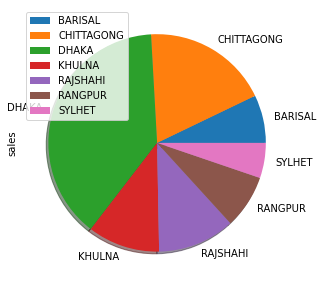

In [9]:
div.plot.pie(y='sales',figsize=(5,5),shadow='True')

**DISTRICT WISE**

In [10]:
cur = con.cursor()
select_stmt_dis = "SELECT  s.district, SUM(ft.total_price) " \
                    "FROM ecomdb_star_schema.fact_table ft " \
                    "JOIN ecomdb_star_schema.store_dim s ON ft.store_key=s.store_key " \
                    "GROUP BY s.district " \
                    "ORDER BY s.district"
cur.execute(select_stmt_dis)
records_dis = cur.fetchall()
dis = pd.DataFrame(list(records_dis), columns=['district', 'sales'])
dis

district       sales
0     BAGERHAT  1302704.00
1    BANDARBAN   992436.75
2      BARGUNA   866100.00
3      BARISAL  2886136.75
4        BHOLA  1009094.75
..         ...         ...
59   SIRAJGANJ  1290102.75
60   SUNAMGANJ  1587008.00
61      SYLHET  1721529.25
62     TANGAIL  1768836.25
63  THAKURGAON   727367.25

[64 rows x 2 columns]

In [11]:
changetype(dis)

In [12]:
dis.dtypes

district     object
sales       float64
dtype: object

In [13]:
dis=dis.set_index(['district'])

In [ ]:
plt.bar(dis['district'],dis['sales'])
plt.show()

<AxesSubplot:ylabel='sales'>

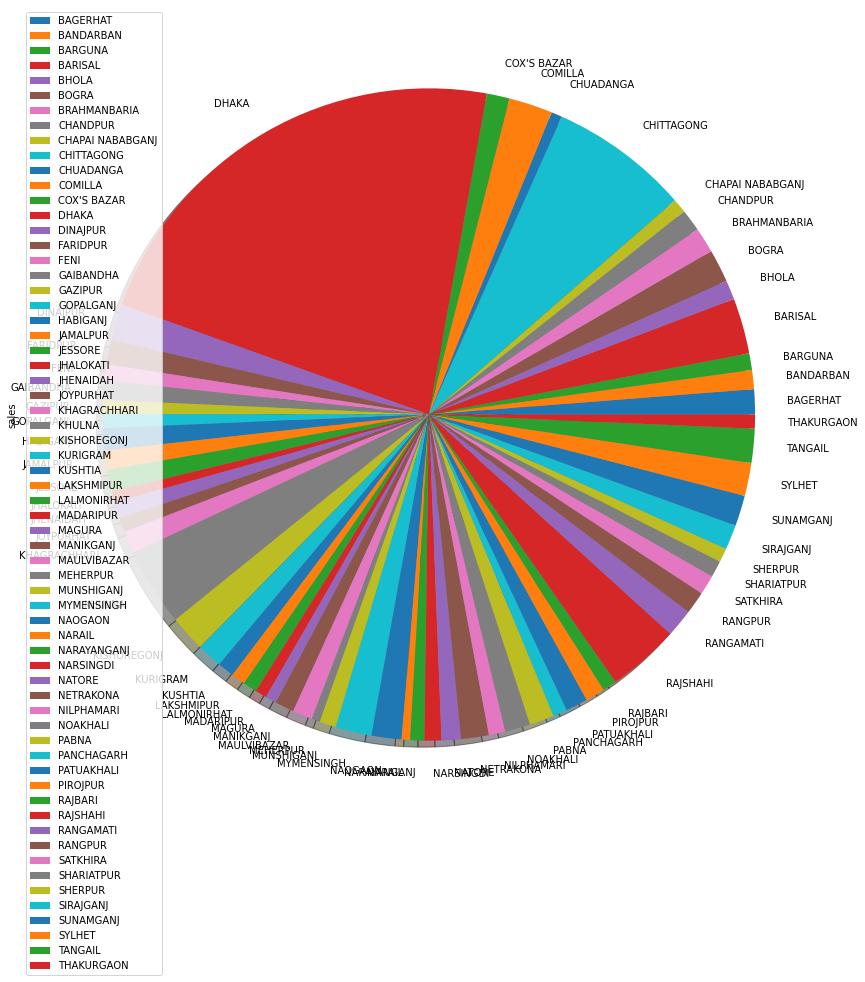

In [38]:
dis.plot.pie(y='sales',figsize=(15,15),shadow='True')

**YEAR WISE**

In [15]:
cur = con.cursor()
select_stmt_time = "SELECT  tim.year, SUM(ft.total_price) " \
                    "FROM ecomdb_star_schema.fact_table ft " \
                    "JOIN ecomdb_star_schema.time_dim tim ON ft.time_key=tim.time_key " \
                    "GROUP BY tim.year " \
                    "ORDER BY tim.year"
cur.execute(select_stmt_time)
records_time = cur.fetchall()
time = pd.DataFrame(list(records_time), columns=['year', 'sales'])
time

year        sales
0  2014  14282235.25
1  2015  15042238.25
2  2016  14923111.25
3  2017  14961797.00
4  2018  15053967.25
5  2019  14897252.25
6  2020  14983861.25
7  2021    879675.25

In [16]:
time.dtypes

year      int64
sales    object
dtype: object

In [17]:
changetype(time)

In [18]:
time=time.set_index(['year'])

<AxesSubplot:ylabel='sales'>

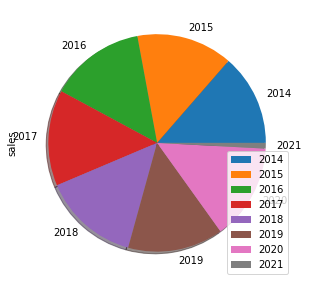

In [19]:
time.plot.pie(y='sales',figsize=(5,5),shadow='True')

**MONTH WISE**

In [20]:
cur = con.cursor()
select_stmt_month = "SELECT  tim.month, SUM(ft.total_price) " \
                    "FROM ecomdb_star_schema.fact_table ft " \
                    "JOIN ecomdb_star_schema.time_dim tim ON ft.time_key=tim.time_key " \
                    "GROUP BY tim.month " \
                    "ORDER BY tim.month"
cur.execute(select_stmt_month)
records_month = cur.fetchall()
month = pd.DataFrame(list(records_month), columns=['month', 'sales'])
month

month       sales
0       1  9009451.00
1       2  8042988.50
2       3  8906699.00
3       4  8470906.75
4       5  9047402.50
5       6  8526882.00
6       7  9014314.00
7       8  8898824.25
8       9  8696021.50
9      10  8872234.75
10     11  8647828.00
11     12  8890585.50

In [21]:
changetype(month)

In [22]:
month=month.set_index(['month'])

<AxesSubplot:ylabel='sales'>

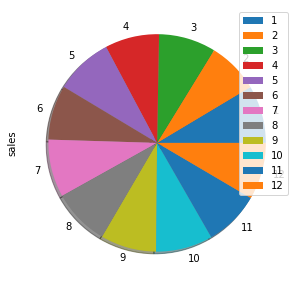

In [23]:
month.plot.pie(y='sales',figsize=(5,5),shadow='True')

**#Q2: Find the customer/bank/transaction(cash/online) wise total_sale_price joining fact table and respective dimension table**

**CUSTOMER WISE**

In [39]:
cur = con.cursor()
select_stmt_cus = "SELECT  cus.name, SUM(ft.total_price) " \
                    "FROM ecomdb_star_schema.fact_table ft " \
                    "JOIN ecomdb_star_schema.coustomer_dim cus ON ft.coustomer_key=cus.coustomer_key " \
                    "GROUP BY cus.name " \
                    "ORDER BY cus.name"
cur.execute(select_stmt_cus)
records_cus = cur.fetchall()
cus = pd.DataFrame(list(records_cus), columns=['name', 'sales'])
cus

name     sales
0                  -  20507.50
1     aafreen fatima  11174.75
2             aafrin  22051.75
3     aafrin @ dolly  23529.75
4      aaftaab husan   9546.00
...              ...       ...
4532           बबीता  10356.75
4533           मन्जू  10575.75
4534            माया   9828.50
4535            सरोज  11280.00
4536          सानिया  10908.00

[4537 rows x 2 columns]

In [40]:
cus.dtypes

name     object
sales    object
dtype: object

In [41]:
changetype(cus)

In [48]:
df=cus[0:5]

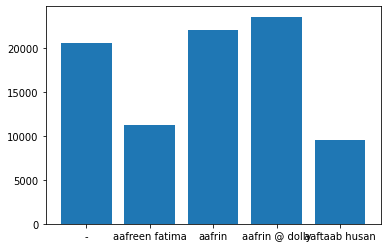

In [49]:
plt.bar(df['name'],df['sales'])
plt.show()

In [52]:
df=cus[0:20]
df=df.set_index(['name'])

<AxesSubplot:ylabel='sales'>

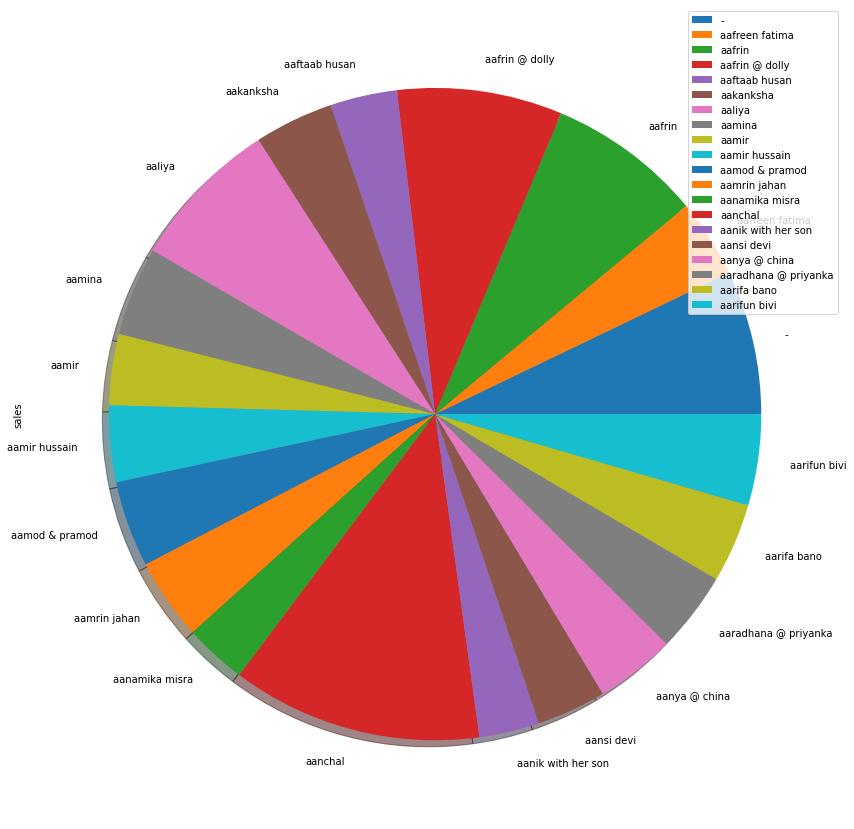

In [53]:
df.plot.pie(y='sales',figsize=(15,15),shadow='True')

In [28]:
cus=cus.set_index(['name'])

***huge data to be displayed via pie chart, so I have used first 20 participants data***

**BANK WISE**

In [31]:
cur = con.cursor()
select_stmt_bank = "SELECT  tr.bank_name, SUM(ft.total_price) " \
                    "FROM ecomdb_star_schema.fact_table ft " \
                    "JOIN ecomdb_star_schema.trans_dim tr ON ft.payment_key=tr.payment_key " \
                    "GROUP BY tr.bank_name " \
                    "ORDER BY tr.bank_name"
cur.execute(select_stmt_bank)
records_bank = cur.fetchall()
bank = pd.DataFrame(list(records_bank), columns=['bank_name', 'sales'])
bank.head(5)

bank_name       sales
0                   AB Bank Limited  2718451.50
1  Bangladesh Commerce Bank Limited  2719269.25
2                 Bank Asia Limited  2678217.75
3        Bengal Commercial Bank Ltd  2693079.25
4                             Bkash  2679288.50

In [32]:
bank.dtypes

bank_name    object
sales        object
dtype: object

In [33]:
changetype(bank)

In [34]:
bank = bank.set_index(['bank_name'])

<AxesSubplot:ylabel='sales'>

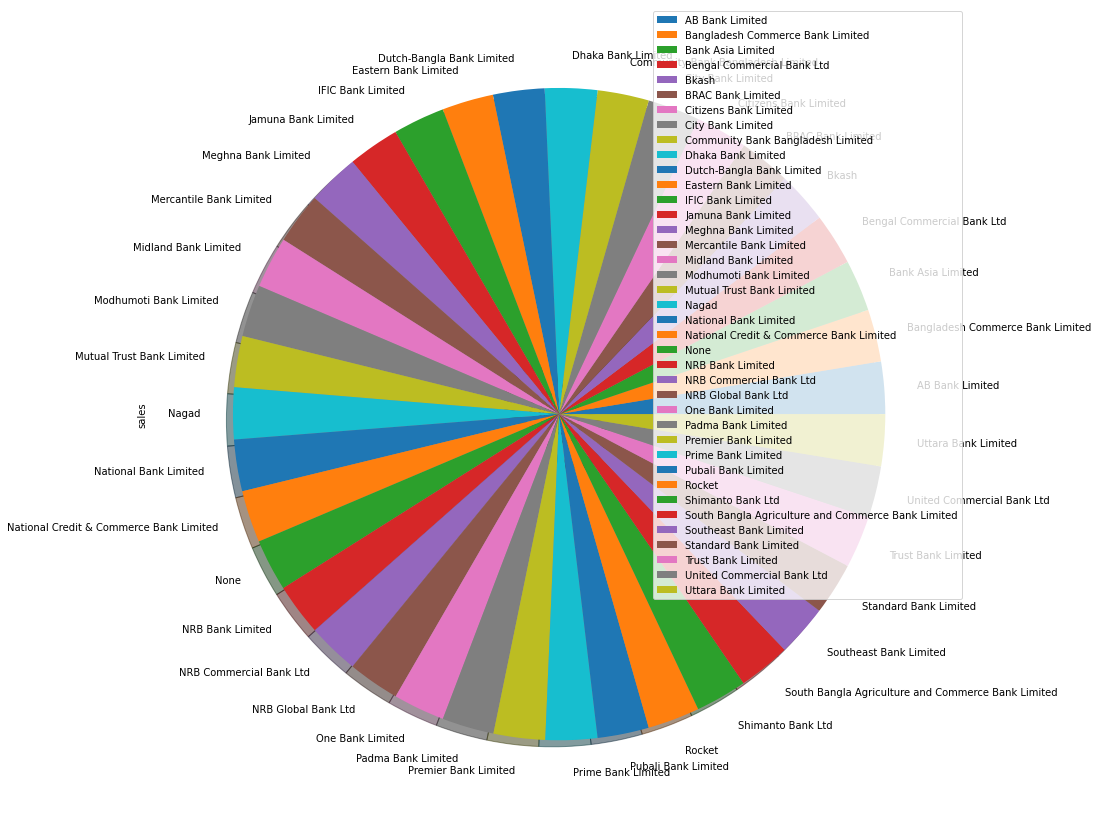

In [37]:
bank.plot.pie(y='sales',figsize=(15,15),shadow='True')

**TRANSACTION WISE**

In [55]:
cur = con.cursor()
select_stmt_transtype = "SELECT  tr.trans_type, SUM(ft.total_price) " \
                    "FROM ecomdb_star_schema.fact_table ft " \
                    "JOIN ecomdb_star_schema.trans_dim tr ON ft.payment_key=tr.payment_key " \
                    "GROUP BY tr.trans_type " \
                    "ORDER BY tr.trans_type"
cur.execute(select_stmt_transtype)
records_transtype = cur.fetchall()
transtype = pd.DataFrame(list(records_transtype), columns=['trans_type', 'sales'])
transtype

trans_type        sales
0       card  94244602.50
1       cash   2698196.75
2     mobile   8081338.50

In [56]:
transtype.dtypes

trans_type    object
sales         object
dtype: object

In [57]:
changetype(transtype)

In [58]:
transtype = transtype.set_index(['trans_type'])

<AxesSubplot:ylabel='sales'>

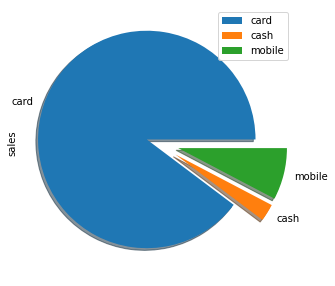

In [63]:
myexplode = [0.1, 0.2, 0.2]
transtype.plot.pie(y='sales',figsize=(5,5),shadow='True',explode=myexplode)

**#Q3: Total sales in Barisal**

In [64]:
cur = con.cursor()
select_stmt_bari = "SELECT  s.division, SUM(ft.total_price) " \
                    "FROM ecomdb_star_schema.fact_table ft " \
                    "JOIN ecomdb_star_schema.store_dim s ON ft.store_key=s.store_key " \
                    "WHERE s.division='BARISAL' "\
                    "GROUP BY s.division"
cur.execute(select_stmt_bari)
records_bari = cur.fetchall()
bar = pd.DataFrame(list(records_bari), columns=['division', 'sales'])
bar

division       sales
0  BARISAL  7494214.75

In [71]:
print(bar['sales'][0])

7494214.75


**#Q4:Total sales in 2015**

In [73]:
cur = con.cursor()
select_stmt_time2015 = "SELECT  tim.year, SUM(ft.total_price) " \
                    "FROM ecomdb_star_schema.fact_table ft " \
                    "JOIN ecomdb_star_schema.time_dim tim ON ft.time_key=tim.time_key " \
                    "WHERE tim.year=2015 "\
                    "GROUP BY tim.year"
cur.execute(select_stmt_time2015)
records_time2015 = cur.fetchall()
time2015 = pd.DataFrame(list(records_time2015), columns=['year', 'sales'])
time2015

year        sales
0  2015  15042238.25

In [74]:
print(time2015['sales'][0])

15042238.25


**#Q5:Total sales of Barisal in 2015**

In [81]:
cur = con.cursor()
select_stmt_bar2015 = "SELECT s.division, tim.year, SUM(ft.total_price) " \
                    "FROM ecomdb_star_schema.fact_table ft " \
                    "JOIN ecomdb_star_schema.time_dim tim ON ft.time_key=tim.time_key " \
                    "JOIN ecomdb_star_schema.store_dim s ON ft.store_key=s.store_key " \
                    "WHERE tim.year=2015 AND s.division='BARISAL'"\
                    "GROUP BY s.division,tim.year"
cur.execute(select_stmt_bar2015)
records_bar2015 = cur.fetchall()
bar2015 = pd.DataFrame(list(records_bar2015), columns=['division','year', 'sales'])
bar2015

division  year       sales
0  BARISAL  2015  1073451.75

In [82]:
print(bar2015['sales'][0])

1073451.75


**#Q6:For each store(item supplier), what are the top three products offered that are most often purchased?**

**#Q7: What products have been sold through card or mobile since X days?**

**THROUGH CARD**

In [167]:
x=input('Enter number of days: ')

Enter number of days: 389


In [163]:

cur = con.cursor()
s1='''SELECT i.item_name,tim.dates,tt.trans_type 
                    FROM ecomdb_star_schema.fact_table ft 
                    JOIN ecomdb_star_schema.item_dim i ON i.item_key=ft.item_key 
                    JOIN ecomdb_star_schema.trans_dim tt ON tt.payment_key=ft.payment_key 
                    JOIN ecomdb_star_schema.time_dim tim ON tim.time_key=ft.time_key
                    WHERE tim.dates>(CURRENT_DATE::date - '
                    '''
s2=str(x)+" days'::interval) AND tt.trans_type='card'"

select_stmt_card = s1+s2
cur.execute(select_stmt_card)
records_card = cur.fetchall()
card = pd.DataFrame(list(records_card), columns=['item_name','dates', 'trans_type'])
card

item_name               dates trans_type
0           Ozarka Spring Water 16.9 oz bottles 2021-01-22 16:51:00       card
1    Kellogg Fun Mix Cheez it, Prngls, Fam Amos 2021-01-22 16:51:00       card
2                  Frito Fiesta Flavors Variety 2021-01-22 16:51:00       card
3                    Red Bull Sugar Free 8.4 oz 2021-01-22 16:51:00       card
4               La Croix Sparkling Orange 12 oz 2021-01-22 16:51:00       card
..                                          ...                 ...        ...
385               Sargento String Cheese 0.75oz 2021-01-22 11:35:00       card
386      Apple Sauce Variety GoGO Squeeze 3.2oz 2021-01-22 11:35:00       card
387                  A&W Root Beer - 12 oz cans 2021-01-22 01:32:00       card
388                Waterloo Sparkling Lime 12oz 2021-01-22 01:32:00       card
389                          Njoy Creamer Packs 2021-01-22 01:32:00       card

[390 rows x 3 columns]

In [164]:
card.dtypes

item_name             object
dates         datetime64[ns]
trans_type            object
dtype: object

**THROUGH MOBILE**

In [171]:
cur = con.cursor()
s1='''SELECT i.item_name,tim.dates,tt.trans_type 
                    FROM ecomdb_star_schema.fact_table ft 
                    JOIN ecomdb_star_schema.item_dim i ON i.item_key=ft.item_key 
                    JOIN ecomdb_star_schema.trans_dim tt ON tt.payment_key=ft.payment_key 
                    JOIN ecomdb_star_schema.time_dim tim ON tim.time_key=ft.time_key
                    WHERE tim.dates>(CURRENT_DATE::date - '
                    '''
s2=str(x)+" days'::interval) AND tt.trans_type='mobile' "

select_stmt_mob = s1+s2
cur.execute(select_stmt_mob)
records_mob = cur.fetchall()
mob = pd.DataFrame(list(records_mob), columns=['item_name','dates', 'trans_type'])
mob

item_name               dates trans_type
0             G2 Lo Calorie Variety 20 oz 2021-01-22 14:15:00     mobile
1              Hand Sanitizer Refill Pump 2021-01-22 14:15:00     mobile
2             Unsalted Premium Blend Nuts 2021-01-22 01:42:00     mobile
3            Pringles Snak Stacks Variety 2021-01-22 12:38:00     mobile
4                     Sprite - 12 oz cans 2021-01-23 01:44:00     mobile
5         Belvita Hard Biscuits Blueberry 2021-01-22 03:09:00     mobile
6             Njoy Creamer Canister 16 oz 2021-01-23 04:01:00     mobile
7        Premier Protein Shake Choc. 11oz 2021-01-22 07:30:00     mobile
8       Diet Coke Caffeine Free 12oz cans 2021-01-22 16:09:00     mobile
9              Hand Sanitizer Refill Pump 2021-01-22 16:09:00     mobile
10     Wint O Green LifeSavers Sugar Free 2021-01-22 10:31:00     mobile
11            Foam Coffee Cups - 20 ounce 2021-01-23 03:11:00     mobile
12      Diet Coke Caffeine Free 12oz cans 2021-01-23 03:11:00     mobile
13              Frito Classic Mix Variety 2021-01-22 16:51:00     mobile
14          Waterloo Sparkling Mango 12oz 2021-01-22 23:10:00     mobile
15  Coffee-mate Original Powdered Creamer 2021-01-22 12:22:00     mobile
16    Fiber One 90 Calorie Fudge Brownies 2021-01-22 12:22:00     mobile
17          Waterloo Sparkling Lemon 12oz 2021-01-22 02:27:00     mobile
18        A&W Root Beer Diet - 12 oz cans 2021-01-22 00:22:00     mobile
19                   Famous Amos Cookies  2021-01-22 00:22:00     mobile
20                      Veggie Chips 1oz  2021-01-22 16:25:00     mobile
21                          Fuze Iced Tea 2021-01-22 09:59:00     mobile
22               M&M Peanut Butter 1.6 oz 2021-01-22 09:59:00     mobile
23             Clorox Disinfecting Wipes  2021-01-22 08:13:00     mobile
24        Wonderful Pistachios (in shell) 2021-01-23 04:38:00     mobile
25          Ice Breaker Mints Sugar Free  2021-01-23 04:38:00     mobile
26            Foam Coffee Cups - 12 ounce 2021-01-22 19:57:00     mobile
27           Lance Variety Cracker Packs  2021-01-22 19:57:00     mobile
28                 Topo Chico 12 oz glass 2021-01-22 19:35:00     mobile
29          All Purpose Cleaner 409 Spray 2021-01-22 19:35:00     mobile
30      Chewy Granola Variety Bars Quaker 2021-01-22 19:35:00     mobile
31        Frito BOLD Flavors Variety Pack 2021-01-22 18:47:00     mobile
32          K Cups - McCafe Premium Roast 2021-01-22 01:32:00     mobile
33        Dial Anti-bacterial  Foam 7.5oz 2021-01-22 01:32:00     mobile

<AxesSubplot:xlabel='item_name', ylabel='dates'>

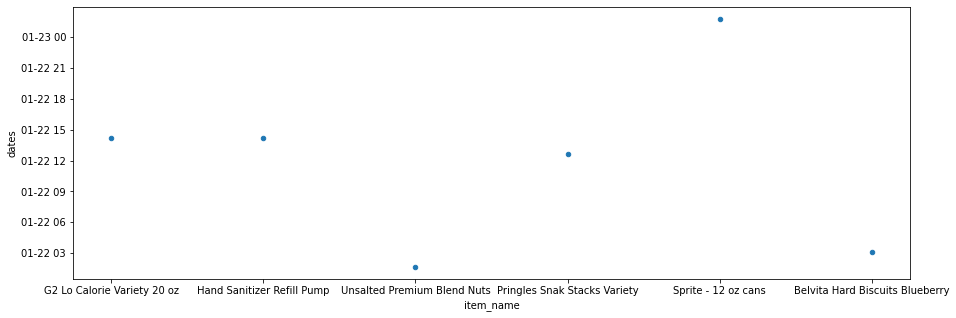

In [192]:
mob[0:6].plot.scatter('item_name','dates',figsize=(15,5))

In [225]:
cur = con.cursor()
s1='''SELECT tt.trans_type,COUNT(*)
                    FROM ecomdb_star_schema.fact_table ft 
                    JOIN ecomdb_star_schema.item_dim i ON i.item_key=ft.item_key 
                    JOIN ecomdb_star_schema.trans_dim tt ON tt.payment_key=ft.payment_key 
                    JOIN ecomdb_star_schema.time_dim tim ON tim.time_key=ft.time_key
                    WHERE tim.dates>(CURRENT_DATE::date - '
                    '''
s2=str(x)+" days'::interval) AND (tt.trans_type='card' OR tt.trans_type='mobile') GROUP BY ROLLUP(trans_type) "

select_stmt_mobcard = s1+s2
cur.execute(select_stmt_mobcard)
records_mobcard = cur.fetchall()
mobcard = pd.DataFrame(list(records_mobcard), columns=['trans_type','count'])
mobcard

trans_type  count
0       None    424
1     mobile     34
2       card    390

In [226]:
mobcard.dtypes

trans_type    object
count          int64
dtype: object

<AxesSubplot:ylabel='count'>

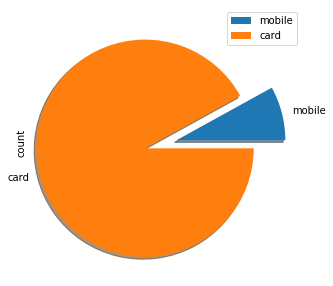

In [227]:
myexplode = [0.1, 0.2]
mobcard = mobcard.set_index(['trans_type'])
l=mobcard[1:3]
l.plot.pie(y='count',figsize=(5,5),shadow='True',explode=myexplode)